Equations for when the angle is 15.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=5.953 with a height of 17.718.
The range of the projectile is 264.500.


Equations for when the angle is 30.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=11.500 with a height of 66.125.
The range of the projectile is 458.127.


Equations for when the angle is 45.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=16.263 with a height of 132.250.
The range of the projectile is 529.000.


Equations for when the angle is 75.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=22.216 with a height of 246.782.
The range of the projectile is 264.500.


Equations for when the angle is 23.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=8.987 with a height of 40.381.
The range of the projectile is 380.531.




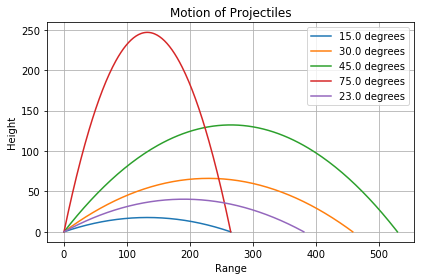

In [6]:
import tkinter as tk
import numpy as np
import scipy as sp
from sympy import *
from scipy.integrate import odeint
from IPython.display import display
import matplotlib.pyplot as plt
init_printing()

window = tk.Tk()
window.title("Kinematics")

#initial height
lab = tk.Label(window, text = "Initial Height: ").grid(column=0, row=0)
ent = tk.Entry(window, width=10)
ent.grid(column=1, row=0)
ent.insert(0, '0')

#initial projectile velocity
lab1 = tk.Label(window, text = "Initial Velocity: ").grid(column=0,row=1)
ent1 = tk.Entry(window, width=10)
ent1.grid(column=1, row=1)
ent1.insert(0, '0')

#angle of elevation
lab2 = tk.Label(window, text = "Projectile Angle: ").grid(column=0,row=2)
ent2 = tk.Entry(window, width=10)
ent2.grid(column=1,row=2)
ent2.insert(0, '0')

#gravitational acceleration
lab3 = tk.Label(window, text = "Gravity: ").grid(column=0,row=3)
ent3 = tk.Entry(window, width=10)
ent3.grid(column=1,row=3)
ent3.insert(0, "-9.81")


def clicked():
    initial_height = ent.get()
    initial_height = float(initial_height)
    initial_velocity = ent1.get()
    initial_velocity = float(initial_velocity)
    angle = ent2.get()
    angle_fig = angle
    angle = float(angle)
    angle_list = angle
    angle = np.radians(angle)
    gravity = ent3.get()
    gravity = float(gravity)
    
    v = Function('v')
    s = Function('s')
    t = symbols('t')
    
    ranges = []
    heights = []
    angles = [15.0, 30.0, 45.0, 75.0, angle_list]
    angles_radians = np.radians(angles)
    
    #loop through all the requested angles to get their ranges and heights
    for ang in angles:
        #velocity components
        initial_yvelocity = np.sin(np.radians(ang))*initial_velocity
        initial_xvelocity = np.cos(np.radians(ang))*initial_velocity
        
        #equation for the velocity in the y direction
        myODE = Eq(diff(v(t),t), gravity)
        y_velocity = dsolve(myODE, v(t))
        y_velocity = y_velocity.subs(symbols('C1'), initial_yvelocity)
        
        #equation for position in the y direction
        myODE = Eq(diff(s(t),t),y_velocity.rhs)
        y_position = dsolve(myODE, s(t))
        y_position = y_position.subs(symbols('C1'), initial_height)
        
        #equation for velocity in the x direction
        myODE = Eq(diff(v(t),t), 0)
        x_velocity = dsolve(myODE, v(t))
        x_velocity = x_velocity.subs(symbols('C1'), initial_xvelocity)
        
        #equation for the position in the x direction
        myODE = Eq(diff(s(t),t), x_velocity.rhs)
        x_position = dsolve(myODE, s(t))
        x_position = x_position.subs(symbols('C1'), 0)
        
        #getting arrays for height and range
        range_time = solve(y_position.rhs, t)
        time=np.linspace(0, float(range_time[1]), 200)
        f_orig_y = lambdify(t, y_position.rhs)
        f_orig_x = lambdify(t, x_position.rhs)
        y = f_orig_y(time)
        x = f_orig_x(time)
        ranges.append(x)
        heights.append(y)
        
        print('Equations for when the angle is ' + str(ang) + ' degrees:')
        print("y-velocity:")
        display(y_velocity)
        print("x-velocity:")
        display(x_velocity)
        print("y-position:")
        display(y_position)
        print("x-position:")
        display(x_position)
        
        #Find the maximum height, set y-velocity=0
        max_height_time = solve(y_velocity.rhs, t)
        max_height = y_position.rhs.subs(t,max_height_time[0])
        print("The maximum height of the projectile happens at t=" + "%.3f"%max_height_time[0] + " with a height of " "%.3f"%max_height + ".")

        #solving for when the y-position is equal to zero (second time) will get us the time when the max range is reached
        range_time = solve(y_position.rhs, t)
        max_range = x_position.rhs.subs(t,range_time[1])
        print("The range of the projectile is " + "%.3f"%max_range + ".")
        print('\n')
        
    
    %matplotlib inline
    fig = plt.figure()
    plt.grid()
    ax = fig.add_subplot(111)
    for i in range(len(angles)):
        ax.plot(ranges[i], heights[i], label = str(angles[i]) + ' degrees')
    
    ax.set_xlabel("Range")
    ax.set_ylabel("Height")
    ax.set_title("Motion of Projectiles")
    ax.legend(loc="best")
    fig.tight_layout()
    window.destroy()
    #fig.show()
    
    
button = tk.Button(window, text = "Enter", command = clicked)
button.grid(column=0,row=4)

window.mainloop()
plt.show()